# Exploratory data analysis - Income Data

In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from dython.nominal import associations

In [2]:
# path for saving figures
fig_path = '../reports/figs/eda_income'

# helper function for saving figures
def save_fig(fig, filename):
    fig.savefig(os.path.join(fig_path, filename), bbox_inches='tight')

# load data
df = pd.read_csv('../data/income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The prediction goal of this dataset is the binary target 'income'. The following code visualizes the characteristics of 'income', particularly inspected in relation to protected attributes.

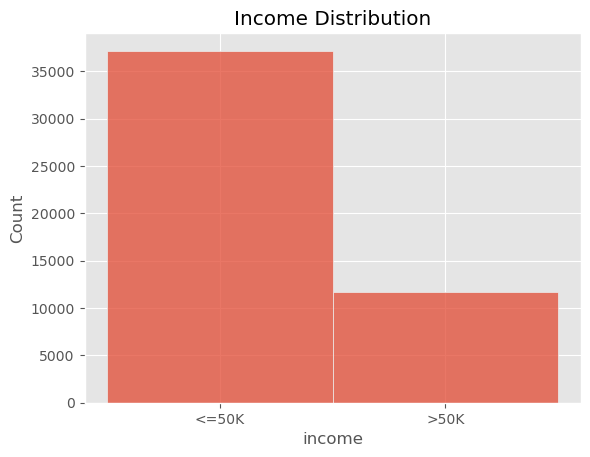

In [3]:
fig, ax = plt.subplots()
sns.histplot(x='income', data=df, ax=ax)
ax.set_title('Income Distribution')

save_fig(fig, 'income_dist.svg')

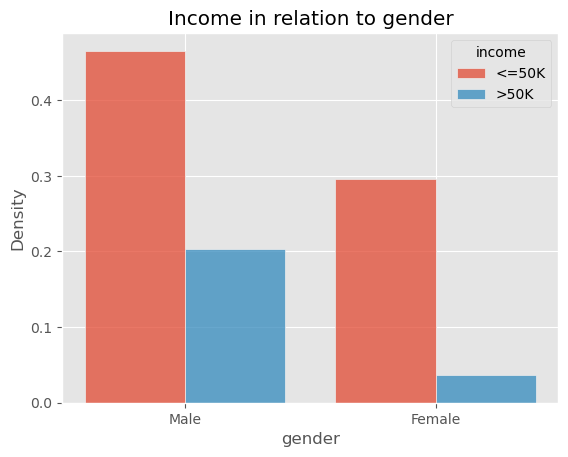

In [4]:
fig, ax = plt.subplots()
sns.histplot(x='gender', data=df, hue='income', multiple='dodge', shrink=.8, stat='density', ax=ax)
ax.set_title('Income in relation to gender')

save_fig(fig, 'income_gender.svg')

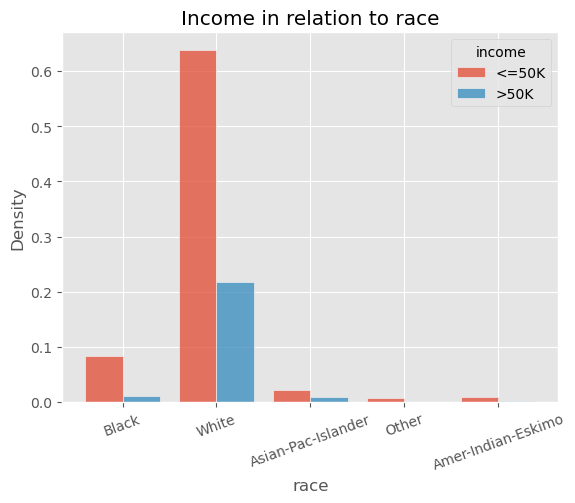

In [5]:
fig, ax = plt.subplots()
sns.histplot(x='race', data=df, hue='income', multiple='dodge', shrink=.8, stat='density', ax=ax)
ax.set_title('Income in relation to race')
ax.tick_params(axis='x', rotation=20)

save_fig(fig, 'income_race.svg')

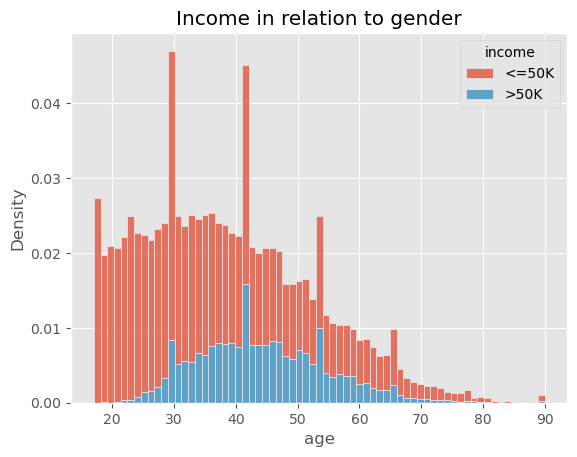

In [6]:
fig, ax = plt.subplots()
sns.histplot(x='age', data=df, hue='income', multiple='stack', stat='density', ax=ax)
ax.set_title('Income in relation to gender')

save_fig(fig, 'income_age.svg')

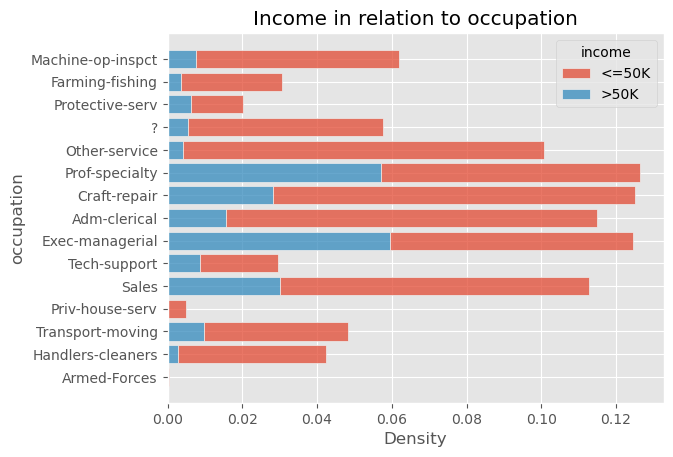

In [7]:
fig, ax = plt.subplots()
sns.histplot(y='occupation', data=df, hue='income', multiple='stack', shrink=.8, stat='density', ax=ax)
ax.set_title('Income in relation to occupation')

save_fig(fig, 'income_occupation.svg')

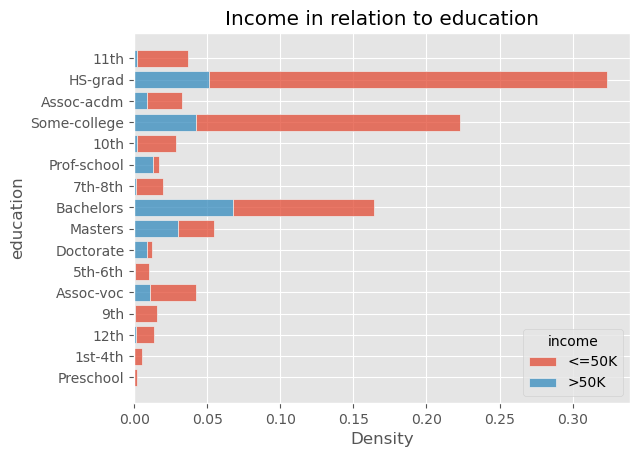

In [8]:
fig, ax = plt.subplots()
sns.histplot(y='education', data=df, hue='income', multiple='stack', shrink=.8, stat='density', ax=ax)
ax.set_title('Income in relation to education')

save_fig(fig, 'income_education.svg')

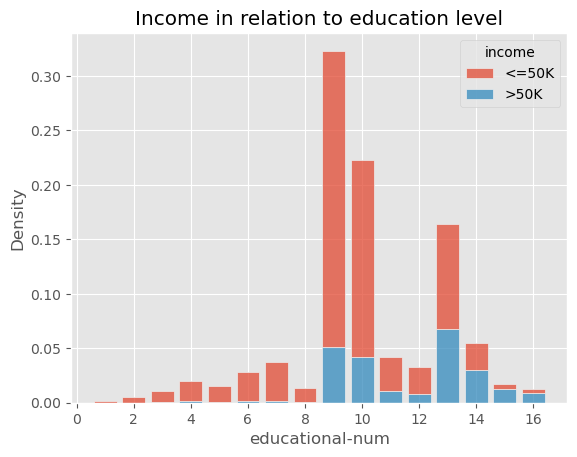

In [9]:
fig, ax = plt.subplots()
sns.histplot(x='educational-num', data=df, hue='income', multiple='stack', shrink=.8, stat='density', discrete=True, ax=ax)
ax.set_title('Income in relation to education level')

save_fig(fig, 'income_education_level.svg')

To find proxies for income, we plot the correlation of all features in relation to eachother. We use dython's associaltions to ensure correct correlation metric, meaning we use Cramer's V for nominal-nominal, Pearson's R for numerical-numerical, and correlation ratio nominal-numerical

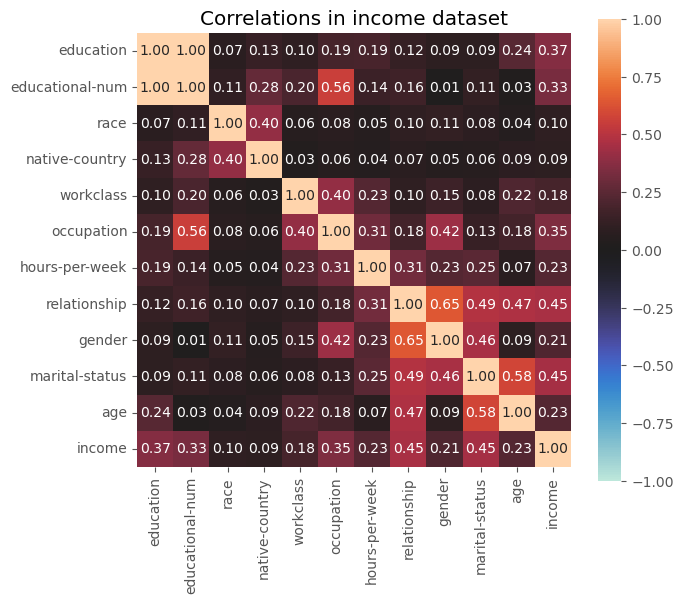

In [10]:
fig, ax = plt.subplots(figsize=(7,6))

nom_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
num_cols = ['age', 'educational-num', 'hours-per-week']
associations(df[nom_cols + num_cols],
             nominal_columns=nom_cols, 
             numerical_columns=num_cols, 
            #  annot=False, 
             title='Correlations in income dataset',
             clustering=True,
             ax=ax)

save_fig(fig, 'income_correlations.svg')